# PSMB5 cis effects

This notebook explores the cis effects of mutations in the PSMB5 gene. PSMB5 is a catalytic subunit of the protease. It is located on chromosome 14 (see <a href="https://www.ensembl.org/Homo_sapiens/Gene/Summary?g=ENSG00000100804;r=14:23016543-23035230;redirect=no">ensembl page</a>).

## Renal: correlation CNV vs. proteomics 

First, load the needed packages and data.

In [1]:
import cptac
import pcanalyzer as pc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

cc = cptac.Ccrcc()
cnv_prot = cc.join_omics_to_omics("CNV", "proteomics", "PSMB5", "PSMB5")

cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-00004.N, C3L-00010.N, C3L-00011.N, C3L-00026.N, C3L-00079.N, C3L-00088.N, C3L-00096.N, C3L-00097.N, C3L-00103.N, C3L-00183.N, C3L-00360.N, C3L-00369.N, C3L-00416.N, C3L-00418.N, C3L-00447.N, C3L-00448.N, C3L-00561.N, C3L-00581.N, C3L-00583.N, C3L-00606.N, C3L-00607.N, C3L-00791.N, C3L-00814.N, C3L-00902.N, C3L-00907.N, C3L-00908.N, C3L-00910.N, C3L-00917.N, C3L-01281.N, C3L-01286.N, C3L-01287.N, C3L-01302.N, C3L-01313.N, C3L-01603.N, C3L-01607.N, C3L-01836.N, C3L-01861.N, C3L-01882.N, C3L-01885.N, C3N-00148.N, C3N-00149.N, C3N-00150.N, C3N-00168.N, C3N-00177.N, C3N-00194.N, C3N-00242.N, C3N-00244.N, C3N-00246.N, C3N-00310.N, C3N-00312.N, C3N-00314.N, C3N-00317.N, C3N-00320.N, C3N-00390.N, C3N-00435.N, C3N-00437.N, C3N-00491.N, C3N-00492.N, C3N-00494.N, C3N-00495.N, C3N-00573.N, C3N-00577.N, C3N-00646.N, C3N-00733.N, C3N-00831.N, C3N-00834.N, C3N-00852.N, C3N-

Print the regression plot.

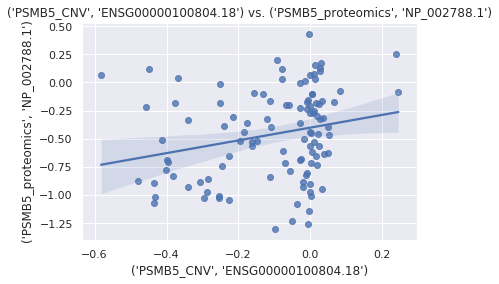

In [2]:
pc.plot_linear_regression(cnv_prot)

Then, run a permutation test for correlation between CNV and protein levels for PSMB5.

In [3]:
coef, P_val, null_dist = pc.permutation_test_corr(cnv_prot, num_permutations=1000000)
print(f"Linear correlation coefficient: {coef}\nP value: {P_val}")

Linear correlation coefficient: 0.2368580611016714
P value: 0.01276


For comparison, let's see what P value we get without permutation testing, using <code>scipy.stats</code>.

In [4]:
import scipy.stats
cnv_prot_na_rm = cnv_prot.dropna()
scipy_coef, scipy_p_val = scipy.stats.pearsonr(cnv_prot_na_rm.iloc[:,0], cnv_prot_na_rm.iloc[:,1])
print(f"scipy.stats coefficient: {scipy_coef}\nscipy.stats P value: {scipy_p_val}")

scipy.stats coefficient: 0.2368580611016715
scipy.stats P value: 0.012725168500834485


For fun, let's print a histogram of the null distribution we generated. The vertical line marks the sample correlation coefficient, r.

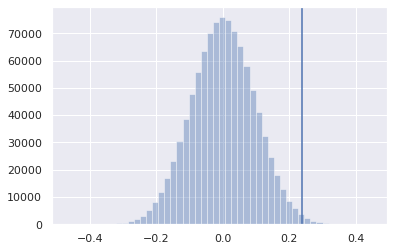

In [5]:
fig, ax = plt.subplots()
sns.distplot(null_dist, ax=ax, kde=False)
plt.axvline(coef, 0, 4)
plt.show()